
# Este proyecto utiliza datos descargados de la CMF (Comisión para el Mercado Financiero) de Chile, correspondientes al stock de cartera de consumo en incumplimiento para el Banco de Chile. El objetivo es ajustar un modelo SARIMA y realizar pronósticos para los próximos 12 meses, evaluando el comportamiento del stock a lo largo del tiempo*

In [ ]:
pip install pandas openpyxl


In [ ]:
import pandas as pd git config

--global user.name "Omar Zambrano"
git config --global user.email "omarzam92@gmail.com"


# Cargar el archivo CMF.xlsx
data = pd.read_excel('CMF.xlsx')

# Visualizar las primeras filas para revisar la estructura del archivo
print(data.head())


   YEAR  MONTH            BCH
0  2011      1  107898.496192
1  2011      2  110084.348544
2  2011      3  116923.482496
3  2011      4  116473.672505
4  2011      5  109851.366498


Vamos a crear un modelo sarima y para ello vamos a combinar las columnas year y month. Nos es beneficioso por las siguientes razones:

 1. Facilita el Análisis de Series Temporales
Los modelos de series temporales, como SARIMA, necesitan trabajar con un índice que sea temporal (es decir, fechas o períodos) para entender la secuencia cronológica de los datos. Tener un índice de fechas nos permite identificar correctamente la estacionalidad y la tendencia.
2. Permite Manejar Fechas como un Objeto Temporal
Al combinar YEAR y MONTH en una única columna de tipo fecha (por ejemplo, 2022-05-01), Python y las bibliotecas como pandas pueden reconocer la información temporal de manera completa, lo que permite aplicar funciones como resampling (reescalar datos por días, meses, años, etc.), gráficos basados en tiempo, y análisis de estacionalidad.
3. Mantiene el Orden Cronológico Correcto
Tener una columna de fecha como índice garantiza que los datos estarán correctamente ordenados en el tiempo, lo cual es crucial para construir y ajustar modelos de pronóstico (forecasting) como ARIMA o SARIMA, que dependen de la secuencia temporal.
4. Facilita la Visualización y el Pronóstico
Al tener una columna de fecha, puedes crear gráficos que muestren la evolución de los datos a lo largo del tiempo, como la evolución mensual del stock de cartera de consumo en incumplimiento del Banco de Chile. Además, se vuelve más sencillo hacer predicciones para fechas futuras.
5. Herramientas de Modelado lo Requieren
Muchos algoritmos para series temporales, incluyendo SARIMA, asumen que el índice temporal es continuo y cronológico. Si solo tuviéramos YEAR y MONTH como columnas separadas, sería difícil que el modelo reconozca la naturaleza temporal de los datos.

In [ ]:

# Combinar YEAR y MONTH en una columna de tipo fecha
data['date'] = pd.to_datetime(data[['YEAR', 'MONTH']].assign(DAY=1))

# Establecer 'date' como índice
data.set_index('date', inplace=True)

# Seleccionar la columna BCH (Banco de Chile)
bch_data = data['BCH']

# Visualizar los datos preparados
print(bch_data.head())

date
2011-01-01    107898.496192
2011-02-01    110084.348544
2011-03-01    116923.482496
2011-04-01    116473.672505
2011-05-01    109851.366498
Name: BCH, dtype: float64


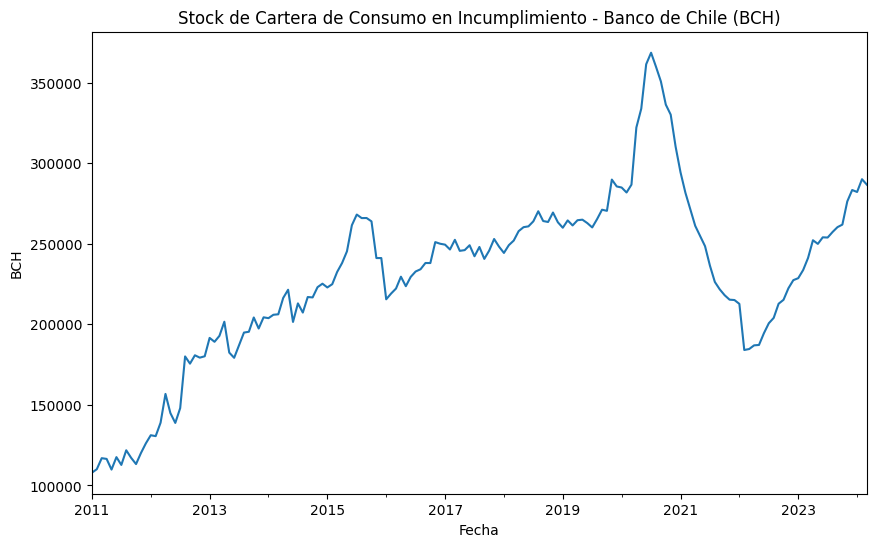

In [ ]:
# Graficar la serie temporal de BCH
bch_data.plot(figsize=(10, 6))
plt.title('Stock de Cartera de Consumo en Incumplimiento - Banco de Chile (BCH)')
plt.xlabel('Fecha')
plt.ylabel('BCH')
plt.show()

**Visualizamos la serie para observar patrones de tendencia, estacionalidad, etc.**

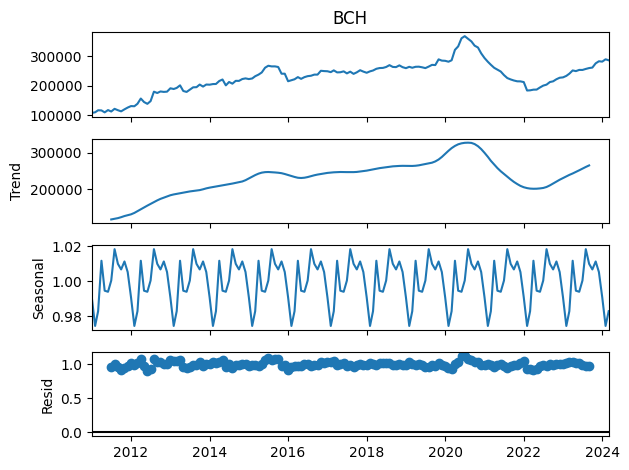

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal (multiplicativa o aditiva)
decomposition = seasonal_decompose(bch_data, model='multiplicative', period=12)
decomposition.plot()
plt.show()


# **La descomposicion de la Serie Temporal nos permite ver los componentes de la serie temporal como tendencia, estacionalidad y residuales.**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con órdenes probados (1, 1, 1) y estacionalidad (1, 1, 1, 12)
model = SARIMAX(bch_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit()

# Mostrar un resumen del modelo ajustado
print(sarima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                BCH   No. Observations:                  159
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1556.762
Date:                            Thu, 19 Sep 2024   AIC                           3123.525
Time:                                    17:36:29   BIC                           3138.443
Sample:                                01-01-2011   HQIC                          3129.586
                                     - 03-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7129      0.249      2.859      0.004       0.224       1.202
ma.L1         -0.5368      0.309   

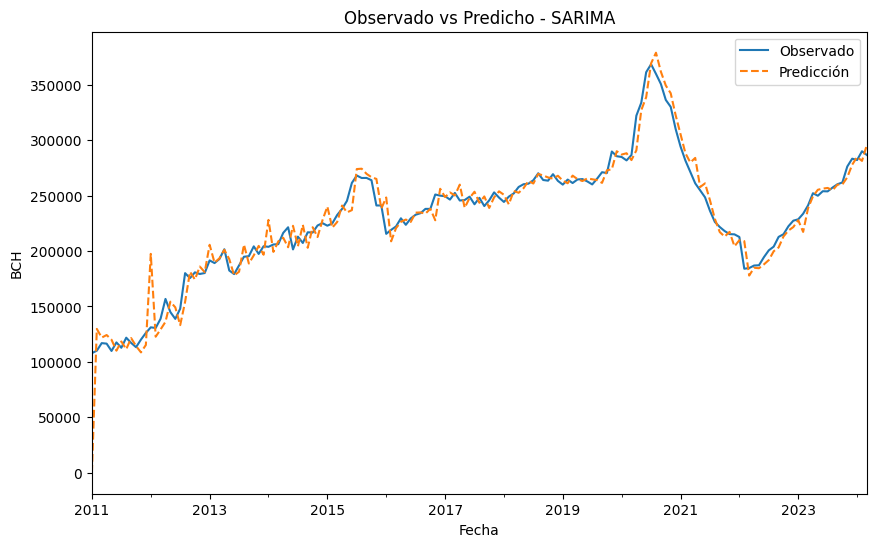

In [ ]:
# Graficar valores observados vs predichos
bch_data.plot(label='Observado', figsize=(10, 6))
sarima_fit.fittedvalues.plot(label='Predicción', linestyle='--')
plt.title('Observado vs Predicho - SARIMA')
plt.xlabel('Fecha')
plt.ylabel('BCH')
plt.legend()
plt.show()


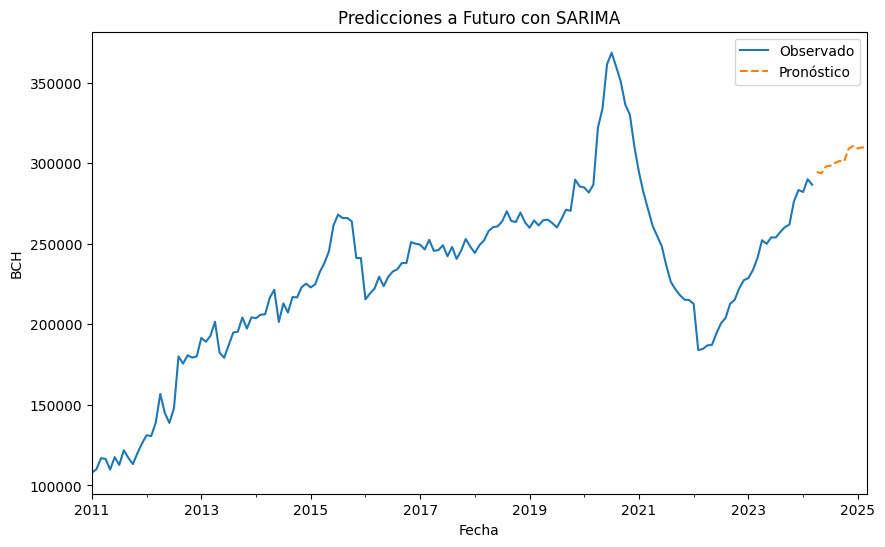

In [ ]:
# Hacer predicciones para los próximos 12 meses
forecast = sarima_fit.get_forecast(steps=12)
predicted_values = forecast.predicted_mean

# Graficar los valores observados y las predicciones
bch_data.plot(label='Observado', figsize=(10, 6))
predicted_values.plot(label='Pronóstico', linestyle='--')
plt.title('Predicciones a Futuro con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('BCH')
plt.legend()
plt.show()


In [ ]:
# Guardar las predicciones en un archivo Excel
predicted_values.to_excel('predicciones_CMF_BCH.xlsx')


## Conclusión
**El modelo SARIMA ajustado permite capturar correctamente las tendencias y estacionalidades en los datos de stock de cartera de consumo en incumplimiento del Banco de Chile. Aunque el modelo se puede mejorar con más variables exógenas, proporciona una base sólida para generar pronósticos razonablemente precisos.**
